# **윤슬의 잔물결✨**



[[윤슬🌊] 퇴근시간 버스승차인원 예측 경진대회 Stage 1: 데이터 불러오기](https://dacon.io/competitions/official/236047/codeshare/7455?page=1&dtype=random)
</br>[[윤슬🌊] 퇴근시간 버스승차인원 예측 경진대회 Stage 2: 데이터 전처리 및 모델링](https://dacon.io/competitions/official/236047/codeshare/7655?page=1&dtype=random)

<br/>
<div style="text-align: right"> 23-01-28 | ver.003 </div>

---



지난 포스팅에서 
</br> <font style="color : #6495ED ; font-weight : bold ; font-size : 25px;">“데이터 전처리”</font> 파트에서 변수 선택과 결측치 처리,
</br><font style="color : #6495ED ; font-weight : bold ; font-size : 25px;">“모델링”</font> 파트에서 모델 선언 및 예측을 하는 시간을 가졌습니다.

</br>우선, 라이브러리와 파일을 다시 불러오겠습니다.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv('train.csv' ,index_col=0)
test = pd.read_csv('test.csv', index_col=0)
bus = pd.read_csv('bus_bts.csv' ,index_col=0)
submission = pd.read_csv('submission_sample.csv', index_col=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


변수 선택 파트에서 다양한 메소드가 등장했습니다.

</br>☝ replace()를 사용하여 in_out 컬럼 데이터에서 ‘시내’는 0으로, ‘시외’는 1로 대체해줬습니다.
</br>✌ drop()을 사용하여 station_name 컬럼을 제거해줬습니다.
</br>👌 to_datetime()과 weekday 함수를 사용하여 날짜를 요일로 변환했습니다.



In [ ]:
# train 데이터셋 전처리
train = train.replace('시내', 0)
train = train.replace('시외', 1)

train = train.drop(['station_name'], axis = 1)

train['date'] = pd.to_datetime(train['date'])
train['date'] = train['date'].dt.weekday

In [ ]:
# test 데이터셋 전처리
test = test.replace('시외', 1)
test = test.replace('시내', 0)

test = test.drop(['station_name'], axis=1)

test['date'] = pd.to_datetime(test['date'])
test['date'] = test['date'].dt.weekday

이젠 train 데이터에서 학습에 사용할 변수 x와 예측할 변수 y를 선택해줘야겠죠?
</br>앞선 포스팅에서 우리가 예측해야 할 변수를 찾아놨습니다.
</br>네, 바로 <font style="color : #6495ED ; font-weight : bold ; font-size : 25px;">‘18~20_ride’</font> 입니다.

</br>따라서, ‘18~20_ride’는 종속변수 y가 되었고, 
</br>y를 제외한 모든 컬럼이 독립변수 x가 되었습니다.



In [ ]:
x = train[['date', 'bus_route_id', 'in_out', 'station_code', 'latitude', 'longitude',
       '6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride', '10~11_ride', '11~12_ride',
       '6~7_takeoff', '7~8_takeoff', '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff']]

y = train['18~20_ride']

모델링에서는 무엇을 했었나요?
</br>바로, 이 파트에서 모델의 종류에 대해 배웠습니다! 정말 여러 종류가 있었죠~

</br>모델을 만들기위해 sklearn 모듈을 사용하고 
</br>fit()과 predict() 메소드를 사용했습니다.

</br>많은 종류 중에서 Stage2에서 사용한 모델은 <font style="color : #6495ED ; font-weight : bold ; font-size : 25px;">"LinearRegression"</font> 이었습니다.

</br>Stage3에서 어떤 모델링 방법을 사용할지 기대되지 않나요?!
</br>끝까지 잘 따라와 주세요💛



# **1. 개념 알아가기**

여러분 EDA를 들어보셨나요?

</br>EDA란 탐색적 자료 분석(Exploratory Data Analysis)의 줄임말로 </br>데이터를 분석하고 결과를 내는 과정에 있어서 지속적으로 해당 데이터에 대한 </br><font style="color:#6495ED; font-weight : bold; font-size : 25px;">“탐색과 이해”</font>를 기본으로 가져야 한다는 것을 의미합니다.

</br>그렇다면 EDA는 무엇을 추구할까요?

1️⃣ <font style="font-weight : bold">저항성</font> : 자료의 일부 변동에 따른 영향을 비교적 작게 받는 성질을 보여준다
</br>2️⃣ <font style="font-weight : bold">잔차분석</font> : 각 관측값이 자료의 주경향으로부터 얼마나 벗어났는가를 보여준다
</br>3️⃣ <font style="font-weight : bold">자료의 재표현</font> : 원래 변수를 자료분석의 단순화를 위해 적당한 척도로 바꾼다
</br>4️⃣ <font style="font-weight : bold">현시성</font> : 그래프로부터 자료 안에 숨겨진 정보를 보여 준다

따라서, 데이터를 다루는 사람이라면 누구나 <font style="font-weight : bold">EDA</font>를 해야 합니다!

</br>Stage2에서 얻은 결과를 토대로 이번 Stage3는 다양한 시각화를 시도 해보려고 합니다.
</br>모두 준비됐나요?

</br>그렇다면, 출발🌊


# **2. 기초통계 시각화**

데이터를 시각화 할 때 사용하는 라이브러리는 다양합니다! 저희는 그중에서도 가장 인기있고 초보자도 이해하기 쉬운  <font style="color:#99CCFF; font-weight : bold; font-size : 25px;">matplotlib</font>을 가지고 시각화를 해보겠습니다.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.pyplot 모듈은 MATLAB과 비슷하게 명령어 스타일로 동작하는 함수의 모음입니다. </br>각각의 함수를 사용해서 간편하게 그래프를 만들고 변화를 줄 수 있습니다.

예를 들어, 그래프 영역을 만들고, 다양한 선을 표현하고, 레이블로 꾸미는 등의 일을 할 수 있습니다.  

코드에서 <font style="font-weight : bold">pyplot</font>은 간단하게 <font style="font-weight : bold">plt</font>로 작성합니다.
</br><font style="color : #666666; font-weight : bold;">(pyplot 그대로 작성하여도 아무 문제 없습니다.!!)</font>

짧게 matplotlib을 이용해 그래프를 그려보겠습니다.!

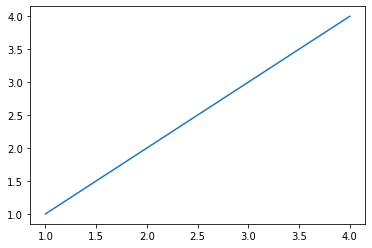

In [ ]:
x_1=[1,2,3,4]
y_1=[1,2,3,4]

plt.plot(x_1,y_1)
plt.show()



x와 y를 1,2,3,4로 지정해 show()함수로 그래프를 화면에 나타나도록 했습니다. 

matplotlib의 기본적인 원리를 이해하셨나요? </br>스테이지3 후반부에서 데이터의 화려한 변신을 확인해봅시다!


## **2.0 기초 통계 분석**

데이터 분석의 가장 기초는 통계입니다. 데이터의 관점에서는 정말 다양한 분석방법이 있습니다. </br>stage3 에선 자료들의 특성을 알 수 있는 방법들을 설명해 드리고자 합니다!

기초 통계는 크게 <font style="font-weight : bold">중심 통계량, 변동 통계량, 형태 통계량, 관계 통계량</font>으로 나눌 수 있습니다.


| **중심통계량**                                       | **변동 통계량**                                              | **형태 통계량**                                              | **관계 통계량**                                    |
| :--------------------------------------------------- | ------------------------------------------------------------ | ------------------------------------------------------------ | -------------------------------------------------- |
| **평균(mean)<br /><br />중앙값(median)<br /><br />최빈값(mode)** | **<br />범위(Range)<br /><br />편차(Deviation)<br /><br />변동(Variation)<br /><br />분산(Variance)<br /><br />표준편차(Standard Deviation)<br /><br />** | **왜도(Skewness)<br /><br />첨도(Kurtosis)<br /><br />이상치(outliner)** | **상관관계(Correlation)<br /><br />인과관계(Causality)** |

각 개념을 알고 싶으시면 [링크](https://han-py.tistory.com/346)를 확인해 주세요.!


파이썬으로 데이터 분석을 할때 자주 사용하는 기초 통계량도 한번 살펴 볼까요? </br>초록색으로 함수를 기록했습니다.   
<br/>

>📌 **기초 통계량**<br/>
- 평균  <font color="339900">mean()</font> <br/>
- 중앙값 <font color="339900">median()</font> <br/>
- 최빈값 <font color="339900">mode()</font><br/>
- 최대값 <font color="339900">max()</font><br/>
- 최소값 <font color="339900">min()</font><br/>
- 분산 <font color="339900">var()</font><br/>
- 표준편차 <font color="339900">std()</font><br/>

<br/>
여러분들도 다 어디선가 들어본 개념들이죠? 
</br>데이터프레임 열을 선택해 옆에 .을 찍고 함수를 사용하면 해당 통계를 알 수 있습니다! 

In [ ]:
train['9~10_ride'].max()

78.0

값이 70으로 나옵니다.<br/>9시에서 10시 사이에 가장 많은 인원이 승차한 버스는 총 70명이 승차 했다는 정보를 알 수 있습니다.  

그리고 이러한 통계적 분포를 한번에 확인 할 수 있는 함수가 있습니다. </br>바로 <font style="font-weight : bold">describe()</font>입니다.

</br>그럼 실습을 통해 train과 train['9~10_ride'] 열의 통계 분포를 확인해 봅시다! 

### **🔑참여 실습**


### *Inst.*  
train과 train['9~10_ride'] 의 통계 분포를 확인해 봅시다.
 
 
### *Hint.*  
describe()


### *Solution.*

In [ ]:
train.describe()
train['9~10_ride'].describe()

count    415423.000000
mean          0.642475
std           1.959844
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          78.000000
Name: 9~10_ride, dtype: float64

그냥 describe()함수만 쓰면 <font style="font-weight : bold">class</font>를 확인할 수 없습니다. 문자열 데이터로 이루어져있기 때문입니다. </br>그래서 문자열로 이루어진 column도 확인하기위해 <font style="font-weight : bold">include</font> 인자값을 이용합니다!

In [ ]:
train.describe(include='all')

,date,bus_route_id,in_out,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
count,415423.000000,4.154230e+05,415423.000000,4.154230e+05,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000
mean,2.719349,2.691935e+07,0.016665,4.209311e+04,33.420375,126.533574,0.305893,0.829699,0.815350,0.642475,0.599618,0.579393,0.112870,0.344870,0.516481,0.430922,0.408001,0.402874,1.242095
std,2.017205,3.924652e+06,0.128013,4.971504e+05,0.107996,0.140986,1.109766,2.255116,2.317561,1.959844,1.885941,1.942137,0.597714,1.279179,1.658850,1.485124,1.412839,1.446080,4.722287
min,0.000000,4.270000e+06,0.000000,1.000000e+00,33.208350,126.165040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.346000e+07,0.000000,3.200000e+02,33.291080,126.475780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.803000e+07,0.000000,1.130000e+03,33.478850,126.529770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,3.003000e+07,0.000000,2.226000e+03,33.500020,126.575890,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,6.000000,3.282000e+07,1.000000,6.115101e+06,33.963640,126.965670,85.000000,94.000000,136.000000,78.000000,124.000000,99.000000,45.000000,66.000000,59.000000,65.000000,52.000000,81.000000,272.000000


include='all'을 추가하면 unique, top,  freq 값을 추가적으로 확인할 수 있습니다.  


<br/>

데이터를 공부해봤거나 공모전이나 경진대회를 준비해본 사람이라면, </br>통계량 중에서 가장 눈에 띄는 통계량은 관계통계량이라는 것을 아실겁니다. </br>저희는 그중에서도 <font style="color:#99CCFF; font-weight : bold; font-size : 25px;">상관관계</font>에 대해 더 자세히 파헤쳐 보려고 합니다! 


## **2.1 상관관계 분석**

*주의! 상관관계와 인관관계는 다릅니다 *

분포에서의 관계가 있음을 알려주는 것이지, 원인과 결과의 관계는 아니라는 것 명심해주세요! 😀

### **(1)  개념 정리**

- <font style="font-weight : bold">상관 분석(상관관계)</font> : 두 변수 간의 선형적 관계를 상관 계수로 표현하는 것
-  <font style="font-weight : bold">공분산</font> : 2개의 변수에 대한 상관 정도. 
</br>2개의 변수 중 하나의 값이 상승하는 경향을 보이면 다른 값도 상승하는 경향을 수치로 표현한 것.
- <font style="font-weight : bold">상관계수</font> : 공분산의 값을 따라서 이를 -1과 1 사이 값으로 변환한 것

<br/>

상관 계수는 공분산만으로 두 확률 변수의 상관 관계를 구한다면 </br>두 변수의 단위 크기에 영향을 받을 수 있습니다. <br/>
그래서 변환이 필요합니다!


<br/>
분자가 공분산을 나타내고 분모의 루트 안의 값을 보면, 변수 x의 분산과 변수 y의 분산으로 표현되는 것을 알 수 있다. 아래의 식이 상관관계의 식이라고 할 수 있다. 좀 더 풀어서 말하면 분자는 X와 Y가 함께 변하는 정도를 나타내고, 분모는 X와 Y가 각각 변하는 정도를 표현한다고 생각하면 된다. 

<p align="center"><img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FBW52R%2Fbtq09krtxKh%2FKckEp1tfp8bJGvVp215YT1%2Fimg.png" alt="img" style="zoom:30%;" /></p>



### **(2) 상관계수**

상관계수를 산정하는 방식에는 <font style="font-weight : bold">피어슨 상관계수, 켄달-타우 상관계수, 스피어만 상관계수</font>가 있습니다.

 <br/>


>**피어슨 상관계수**

 두 변수 간의 선형 상관관계를 계량화 한 수치입니다. </br>코시-슈바르츠 부등식에 의해 +1과 -1사이의 값을 가집니다.

<font style="font-weight : bold">+1의 경우</font> 완벽한 양의 선형 상관 관계, </br><font style="font-weight : bold">-1의 경우</font> 완벽한 음의 상관관계, </br><font style="font-weight : bold">0의 경우</font> 선형 상관관계를 갖지 않습니다.



<p align="center"><img src="https://upload.wikimedia.org/wikipedia/commons/3/34/Correlation_coefficient.png" alt="img" style="zoom:30%;" /></p>
<font style="color : #666666; font-weight : bold;">출처 : 위키피디아 '피어슨 상관계수' 항목</font>


>**켄달-타우상관계수**

켄달-타우 상관계수는 두 변수들간의 순위를 비교해서 연관성을 계산하는 방식입니다.

예를 들어 어린이의 나이와 키에 대한 아래와 같은 순위 데이터를 보면, </br>나이순위에 따라 키의 순위가 동일한 것을 알 수 있습니다.



| 순위   |  A   |  B   |  C   |  D   |  E   |
| ----   | :---: | :---: | :--: | :--: | :--: |
| 나이   |  14  |  15  |  16  |  17  |  18  |
| 키     | 172  | 174  | 176  | 178  | 180  |


이런 경우 완벽한 양의 상관 계수, +1이 됩니다.

<br/>

>**스피어만 등위 상관계수**

스피어만 상관계수는 두 변수의 순위 값 사이의 피어슨 상관 계수와 같습니다.<BR/>
즉, 순서척도가 적용되는 경우에는 스피어만 상관계수가, 간격척도가 적용되는 경우에는 피어슨 상관계수가 적용됩니다.<br/>
이상치가 있거나 표본의 크기가 작을 때 유용하게 사용됩니다. 피어슨 상관 계수에 비해 이상치에 덜 민감하기 때문입니다.

![img](https://ifh.cc/g/WcPTVC.png)

출처: 위키피디아 스피어만 상관계수 항목
 <br/> 
위 그래프처럼 두 변수 X와 Y가 선형 관계가 아니더라도 스피어만 상관 계수는 1이 될 수 있다. 하지만 +1의 피어슨 상관 계수를 보장하지는 않는다.<br/>  


모든 feature들의 의미를 헤아리고, <font style="font-weight : bold">"유의미한 feature를 찾는 것"</font>은 분석에 있어 큰 도움이 됩니다.<br>

그러나, feature의 수가 50개, 100개가 넘는다면? </br>모든 feture들을 헤아리기까지 많은 시간과 노력이 들겁니다! </br>

그래서 feture수가 많을 때 corr() 상관관계를 통해서 상관계수를 구할 수 있습니다.!  
</br>그럼 실습을 통해 train의 상관계수를 구해봅시다!

⭐ train, test data는 <font style="font-weight : bold">오전</font> 시간대의 경우, <font style="font-weight : bold">1시간마다의 승하차 인원수</font>를 표시하고 있습니다. 

하지만 저희가 예측하려고 하는 <font style="font-weight : bold">퇴근</font> 시간대의 경우, <font style="font-weight : bold">2시간에 해당되는 승차 인원</font>을 예측하여합니다.

 전에 오전 시간대에 승차, 하차 인원수들도 2시간 간격으로 합쳐 주려고 합니다. 


그리고 1시간 간격을 2시간 간격으로 바꿔줍니다.

In [ ]:
train['6~8_ride']=train['6~7_ride']+train['7~8_ride'] # 6 ~ 8시 승차인원
train['8~10_ride']=train['8~9_ride']+train['9~10_ride']
train['10~12_ride']=train['10~11_ride']+train['11~12_ride']

train['6~8_off']=train['6~7_takeoff']+train['7~8_takeoff'] # 6 ~ 8시 하차인원
train['8~10_off']=train['8~9_takeoff']+train['9~10_takeoff']
train['10~12_off']=train['10~11_takeoff']+train['11~12_takeoff']


1시간 간격의 열은 삭제하겠습니다.

In [ ]:
train=train.drop(['6~7_ride','7~8_ride','8~9_ride','9~10_ride','10~11_ride','11~12_ride',
              '6~7_takeoff','7~8_takeoff','8~9_takeoff','9~10_takeoff','9~10_takeoff','10~11_takeoff','11~12_takeoff'],axis=1)

test데이터도 2시간 간격으로 맞춰봅시다.

In [ ]:
test['6~8_ride']=test['6~7_ride']+test['7~8_ride'] # 6 ~ 8시 승차인원
test['8~10_ride']=test['8~9_ride']+test['9~10_ride']
test['10~12_ride']=test['10~11_ride']+test['11~12_ride']

test['6~8_off']=test['6~7_takeoff']+test['7~8_takeoff'] # 6 ~ 8시 하차인원
test['8~10_off']=test['8~9_takeoff']+test['9~10_takeoff']
test['10~12_off']=test['10~11_takeoff']+test['11~12_takeoff']


test=test.drop(['6~7_ride','7~8_ride','8~9_ride','9~10_ride','10~11_ride','11~12_ride',
              '6~7_takeoff','7~8_takeoff','8~9_takeoff','9~10_takeoff','9~10_takeoff','10~11_takeoff','11~12_takeoff'],axis=1)

변수 x, y의 값도 바꿔봅시다. 

In [ ]:
x = train[['date', 'bus_route_id', 'in_out', 'station_code', 'latitude', 'longitude',
       "6~8_ride",  "8~10_ride", "10~12_ride" , 
       "6~8_off", "8~10_off",  "10~12_off"]]

y = train['18~20_ride']

### **🔑참여 실습**


### *Inst.*  
train의 상관계수를 구해봅시다.


### *Hint.*  
corr()


### *Solution.*


In [ ]:
train.corr()

,date,bus_route_id,in_out,station_code,latitude,longitude,18~20_ride,6~8_ride,8~10_ride,10~12_ride,6~8_off,8~10_off,10~12_off
date,1.000000,-0.023889,0.006040,0.004411,0.011928,-0.001481,-0.028060,-0.090015,-0.054875,-0.009109,-0.042991,-0.049812,-0.011804
bus_route_id,-0.023889,1.000000,-0.101738,-0.015897,-0.196758,0.010187,-0.143702,-0.121064,-0.152482,-0.147186,-0.075922,-0.126992,-0.129819
in_out,0.006040,-0.101738,1.000000,0.093776,0.009019,-0.065886,0.022116,0.018108,0.027518,0.029083,0.026249,0.021264,0.009070
station_code,0.004411,-0.015897,0.093776,1.000000,-0.048951,-0.011303,0.034360,0.057757,0.064493,0.057443,0.016212,0.025355,0.028111
latitude,0.011928,-0.196758,0.009019,-0.048951,1.000000,0.134208,0.079261,0.070533,0.076039,0.067888,0.059384,0.071983,0.066264
longitude,-0.001481,0.010187,-0.065886,-0.011303,0.134208,1.000000,-0.021368,-0.016122,-0.016620,-0.009165,-0.021890,-0.026493,-0.007275
18~20_ride,-0.028060,-0.143702,0.022116,0.034360,0.079261,-0.021368,1.000000,0.394406,0.538263,0.616721,0.252626,0.334714,0.344370
6~8_ride,-0.090015,-0.121064,0.018108,0.057757,0.070533,-0.016122,0.394406,1.000000,0.548672,0.472073,0.172319,0.120824,0.126953
8~10_ride,-0.054875,-0.152482,0.027518,0.064493,0.076039,-0.016620,0.538263,0.548672,1.000000,0.640145,0.173878,0.347379,0.282250
10~12_ride,-0.009109,-0.147186,0.029083,0.057443,0.067888,-0.009165,0.616721,0.472073,0.640145,1.000000,0.200335,0.312841,0.415901


여기에 다양한 종류의 상관계수는 <font style="color:#99CCFF; font-weight : bold; font-size : 25px;">method='   '</font>를 추가해 구할 수 있습니다.

- <font style="font-weight : bold">피어슨</font> : .corr(method='pearson')
- <font style="font-weight : bold">켄달-타우</font> : .corr(method='kendall')
- <font style="font-weight : bold">스피어만</font> : .corr(method='spearman')

morning.corr()의 값은 새로운 변수 corr에 저장합니다.

In [ ]:
# 소수점 3째자리에서 반올림
corr_df=round(train.corr(),3)

### **(3) 산점도 행렬(scatter_matrix)**

산점도 행렬은 데이터의 특성 중 하나를 x축으로, 또 다른 하나를 y축으로 두어 </br>두 특성의 관계를 하나의 점으로 나타내는 그래프 입니다. </br>2개의 특성으로 묶어 2차원으로 표현하는 것이죠!  한 그래프안에는 두 특성의 관계만 나타납니다.

저희가 다루고 있는 데이터 처럼 특성이 많은 데이터에선 행렬로 나타날 경우 아래처럼 복잡한 그림이 그려집니다.




In [ ]:
from pandas.plotting import scatter_matrix

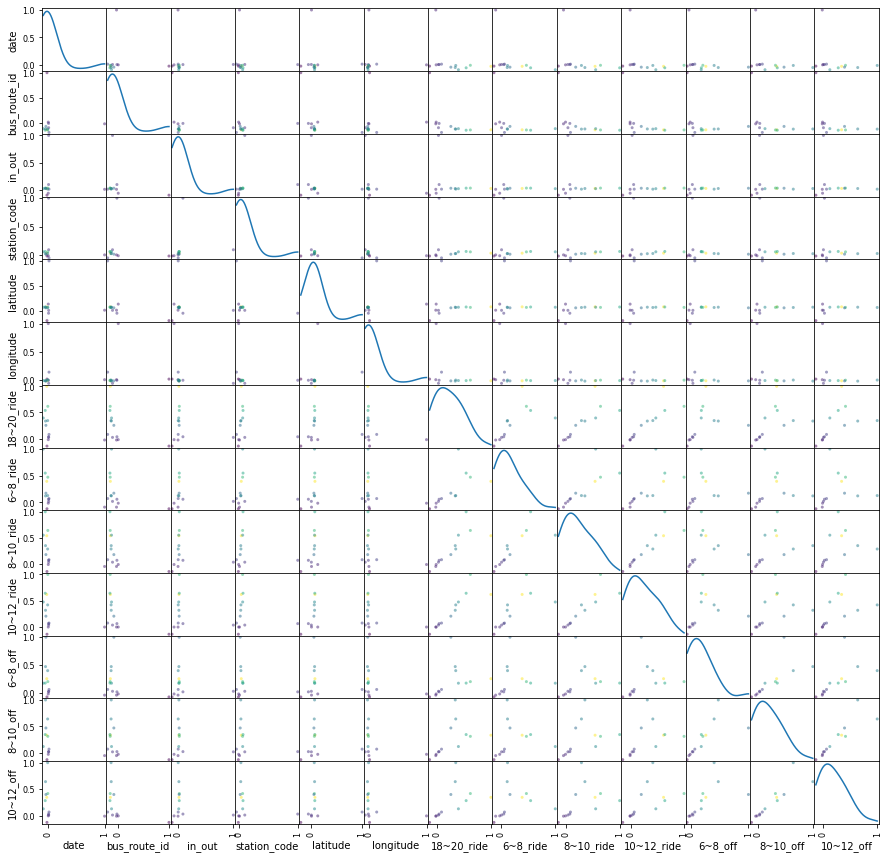

In [ ]:
scatter_matrix(corr_df,
               c = corr_df['18~20_ride'],
               alpha=0.5, 
               figsize=(15, 15), 
               diagonal='kde'
               )
plt.show()


어떤가요? 정말 많은 특성이 있어서... 오히려 비교하기 어려워졌습니다..<br/>

각각의 나누어진 산점도 그래프에는 드러나지 않는 중요한 성질이 있을 수 있습니다. </br>지금처럼 <font style="font-weight : bold">많은 특성</font>을 가진 데이터 말고,,😓 </br><font style="font-weight : bold">특성이 적은</font> 데이터에 활용하면 좋은 데이터 탐색 방법이 될 것입니다😉



추가로 그래프에 표시되는 각 점들은 자료의 관측 값을 나타내며 </br>산점도에서 각 점의 위치는 각 관측값이 가지는 X축, Y축 변수의 값으로 결정되게 됩니다. 

산점도를 이용하면 데이터의 <font style="color:#99CCFF; font-weight : bold; font-size : 25px;">이상치, 특이값</font>을 탐색할 수 있습니다.
</br>그 예시로 train의 date 변수와 지정했던 y 변수의 산점도 그래프를 그려보겠습니다!




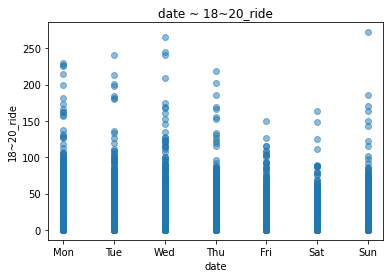

In [ ]:
import matplotlib.pyplot as plt

X = train.date.values
Y = y.values
xlabel=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.scatter(X, Y, alpha=0.5)

#------그래프 설정------#
plt.title('date ~ 18~20_ride')
plt.xlabel('date')
plt.ylabel('18~20_ride')
plt.xticks(range(0,7),xlabel)
plt.show()

그래프를 통해 데이터가 어떻게 분포되어 있는지 확인할 수 있습니다. </br>대부분은 100명이하의 승객이 버스에 탑승한다는 것을 알 수 있겠죠?

### **(4) heatmap**

히트맵(heatmap)은 데이터의 값을 컬러로 변환시켜 열 분포 형태로 보여주어 시각적인 분석을 가능하게 하는 시각화 기법입니다! 

matplolib을 이용해 상관계수값을 한눈에 비교한는 그림을 만들어보겠습니다.

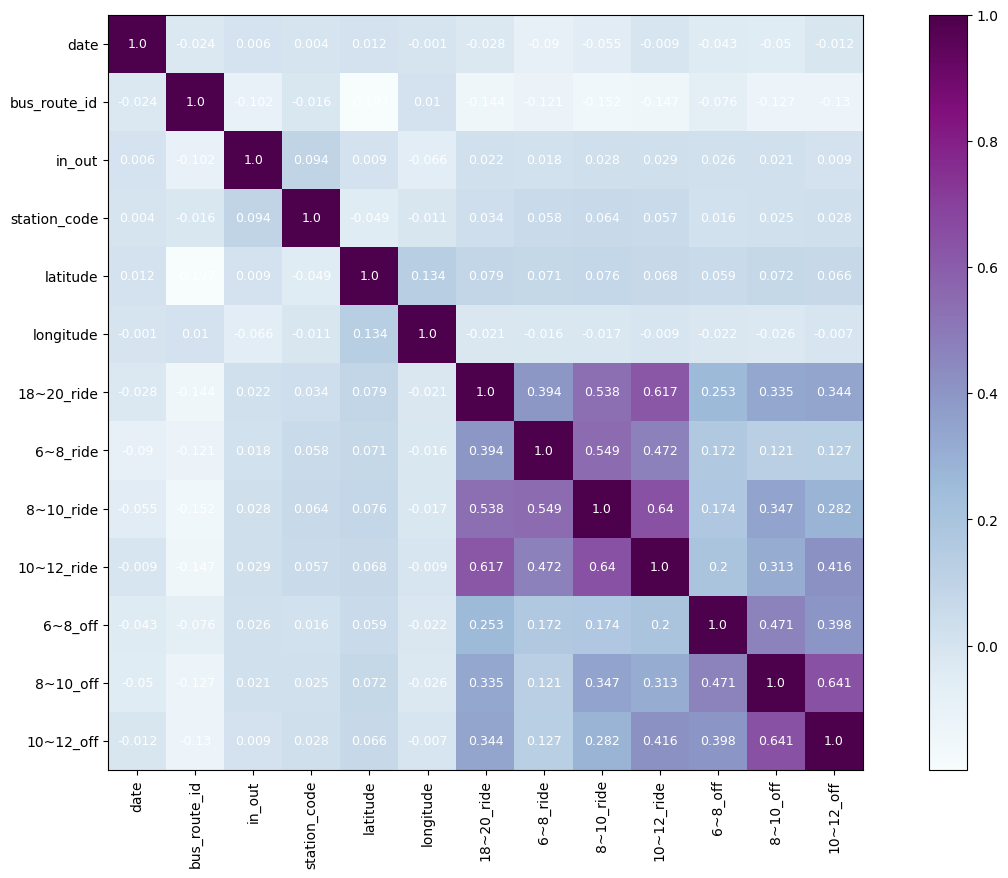

In [ ]:


#figure size
fig=plt.figure(figsize=(17,10), dpi=100)
ax=fig.subplots()


#이미지맵
im = ax.imshow(corr_df, cmap='BuPu')


#Color Bar
cor_bar = ax.figure.colorbar(im, ax=ax)


ax.set_xticks(np.arange(len(corr_df.columns)))
ax.set_yticks(np.arange(len(corr_df.index)))
ax.set_xticklabels(corr_df.columns,rotation=90)
ax.set_yticklabels(corr_df.columns)

#박스안에 텍스트 넣기
for i in range(len(corr_df.columns)):
    for j in range(len(corr_df.index)):
        ax.text(j, i, corr_df.iloc[j, i], ha='center', va='center', color='w',fontsize=9)


어떠신가요? 값으로 비교할 때와는 다르게 어떤 column이 중요한 것인지 파악하기 편리해졌습니다. 
 - 데이터 식별을 위한 date, bus_route_id, latitude, longtitude 보다는 </br>시간별 탑승인원을 나타낸 변수들이 예측 변수와 연관이 많아보입니다! 
 - 하차인원도 탑승인원만큼은 아니지만 조금은 영향이 있어보이죠!

<br/>

matplotlib말고 seabon을 이용하면 더욱 간단하게 그릴 수 있습니다!(사진 캡처입니다.🎁)

![img](https://ifh.cc/g/ZwF4bm.jpg)


훨씬 손쉽게 시각화가 가능합니다! 자신에게 맞는 방법으로 사용하시길 권장합니다! 


## **2.2 변수 그래프 시각화**

이번에는 그래프를 그려서 데이터를 시각화 해봅시다. 

데이터를 시각화하는 <font style="font-weight : bold">이유</font>는 
</br>1️⃣ 많은 양의 데이터를 한눈에 볼 수 있고, 
</br>2️⃣ 빠르고 효과적인 의사결정을 내리는 데 도움을 주기 때문입니다. 


요일 별 승하차 인원에 대한 그래프를 그려봅시다. </br>
그래프를 그리기 위해서 데이터를 정리하는 과정이 필요합니다. 
</br></br>

### **(1) 변수 정의**

**먼저  변수를 새로 정의해 봅시다.**

ride라는 임의의 변수 이름을 정하고  </br>
train 데이터 안에 있는 ride변수명을 모두 가져와서 저장해줍니다. 


In [ ]:
ride=[ "6~8_ride",  "8~10_ride", "10~12_ride" , '18~20_ride']

### **🔑참여 실습**


### *Inst.*  
takeoff라는 임의의 변수 이름을 정하고 train데이터 안에 있는 takeoff 변수명을 저장해봅시다.


### *Hint.*  
takeoff=[]


### *Solution.*

In [ ]:
takeoff = ["6~8_off", "8~10_off",  "10~12_off"]

### **(2) 데이터 합**


이제 요일과 시간별로 데이터 값의 합을 구해봅시다. 

먼저 0, 월요일 일때 시간별 합을 알아봅시다.


In [ ]:
train[train['date']==0].sum()

date            0.000000e+00
bus_route_id    2.090657e+12
in_out          1.262000e+03
station_code    3.163349e+09
latitude        2.588374e+06
longitude       9.800323e+06
18~20_ride      1.040730e+05
6~8_ride        1.020060e+05
8~10_ride       1.244480e+05
10~12_ride      9.571900e+04
6~8_off         3.836700e+04
8~10_off        8.014000e+04
10~12_off       6.601800e+04
dtype: float64

결과값을 보면 시간뿐만 아니라 다른 데이터의 합도 나타납니다. 

이때 뒤에 [ride]를 붙여주면 ride의 값의 합들만 볼 수 있습니다. 


In [ ]:
train[train['date']==0].sum()[ride]

6~8_ride      102006.0
8~10_ride     124448.0
10~12_ride     95719.0
18~20_ride    104073.0
dtype: float64

### **🔑참여 실습**


### *Inst.*  
takeoff의 값의 합들만 출력해봅시다. 


### *Hint.*  
dataframe[]


### *Solution.*

In [ ]:
train[train['date']==0].sum()[takeoff]

6~8_off      38367.0
8~10_off     80140.0
10~12_off    66018.0
dtype: float64

### **(3) 데이터 프레임 생성**

이제는 for문을 사용해서 ride의 시간, 요일별 값을 데이터 프레임에 넣어봅시다. 

먼저 임의의 ridesum라는 빈 리스트를 만들어줍니다. 


In [ ]:
ridesum=[]

그 다음 for문을 사용해서 빈 리스트에 데이터를 넣어줍니다. 

이때 데이터는 요일별 시간데이터의 합입니다. 


In [ ]:
for i in range(0,7):
  ridesum.append(train[train['date']==i][ride].sum())
ridesum

[6~8_ride      102006.0
 8~10_ride     124448.0
 10~12_ride     95719.0
 18~20_ride    104073.0
 dtype: float64, 6~8_ride       86970.0
 8~10_ride     106168.0
 10~12_ride     75030.0
 18~20_ride     87220.0
 dtype: float64, 6~8_ride      84528.0
 8~10_ride     98547.0
 10~12_ride    72862.0
 18~20_ride    88404.0
 dtype: float64, 6~8_ride      71565.0
 8~10_ride     90351.0
 10~12_ride    70122.0
 18~20_ride    74122.0
 dtype: float64, 6~8_ride      67722.0
 8~10_ride     82103.0
 10~12_ride    63345.0
 18~20_ride    59451.0
 dtype: float64, 6~8_ride      28496.0
 8~10_ride     50730.0
 10~12_ride    54517.0
 18~20_ride    48419.0
 dtype: float64, 6~8_ride      30464.0
 8~10_ride     53267.0
 10~12_ride    58193.0
 18~20_ride    54306.0
 dtype: float64]

출력값을 보면 리스트의 형태로 ride 합의 값들이 모두 들어간 것을 알 수 있습니다. </br>
이제 ridesum의 값을 넣을 새로운 데이터 프레임을 만들어봅시다. </br>

데이터프레임을 생성하는 메소드는 pd.DataFrame()입니다. 
</br> 빈 데이터 프레임에 열 이름과 리스트를 넣어봅시다. 


In [ ]:
weekride=pd.DataFrame(ridesum, columns=ride)
weekride

,6~8_ride,8~10_ride,10~12_ride,18~20_ride
0,102006.0,124448.0,95719.0,104073.0
1,86970.0,106168.0,75030.0,87220.0
2,84528.0,98547.0,72862.0,88404.0
3,71565.0,90351.0,70122.0,74122.0
4,67722.0,82103.0,63345.0,59451.0
5,28496.0,50730.0,54517.0,48419.0
6,30464.0,53267.0,58193.0,54306.0


출력값을 보면 데이터가 데이터 프레임에 잘 들어간 것을 확인할 수 있습니다. 

### **🔑참여 실습**


### *Inst.*  
takeoff의 데이터프레임을 만들어봅시다. 


### *Hint.*  
for문, pd.DataFrame()


### *Solution.*

In [ ]:
takeoffsum=[]
for i in range(0,7):
  takeoffsum.append(train[train['date']==i][takeoff].sum())
  
weektakeoff=pd.DataFrame(takeoffsum, columns=takeoff)
weektakeoff

,6~8_off,8~10_off,10~12_off
0,38367.0,80140.0,66018.0
1,32995.0,69546.0,52522.0
2,32357.0,63643.0,50068.0
3,28520.0,59019.0,48787.0
4,27151.0,55245.0,44203.0
5,14599.0,32043.0,36171.0
6,16167.0,33937.0,39087.0


이제 시각화를 하기위한 데이터 준비는 모두 끝났습니다. 

본격적인 데이터 시각화를 진행해 봅시다.


### **(4) 기본 그래프**

먼저 weekride를 살펴보겠습니다. 

pandas에서는 시리즈와 데이터 프레임에 plot메소드를 지원합니다. </br>
이번에는 pandas에서 제공하는 plot메소드를 사용해서 그래프를 그려봅시다.


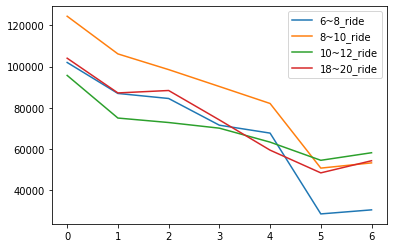

In [ ]:
weekride.plot()

그래프의 크기가 너무 작으니, 크기를 키워봅시다. 

figsize=(10, 10) 는 그래프의 크기를 10x10으로 키워줍니다.

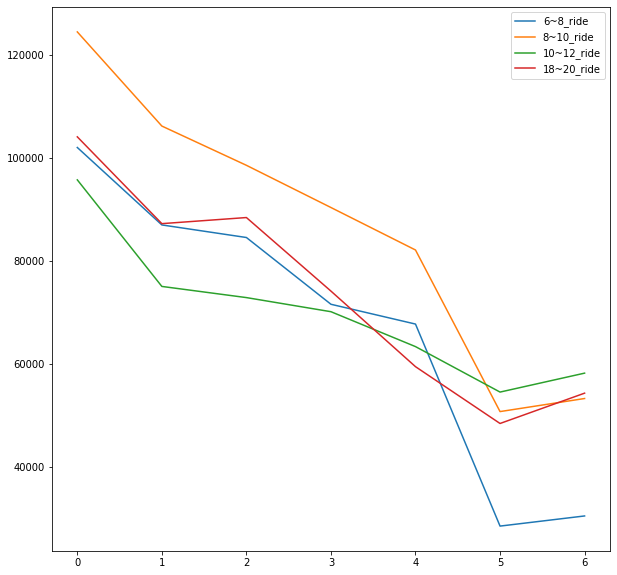

In [ ]:
weekride.plot( figsize=(10, 10))

막대그래프로 한번 살펴봅시다. 

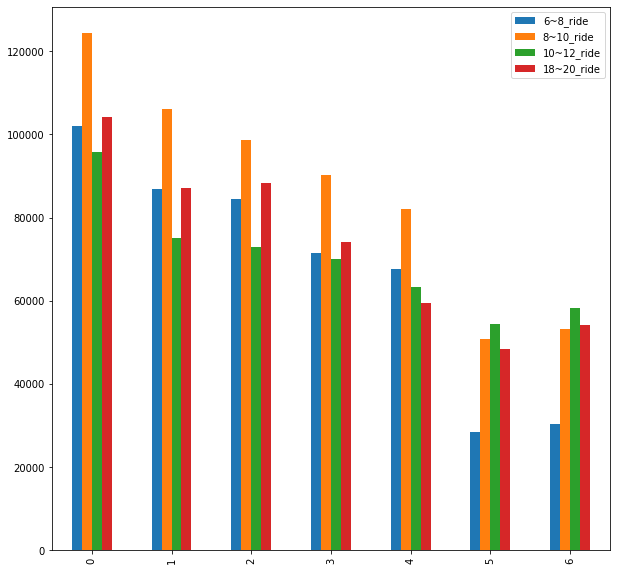

In [ ]:
weekride.plot(kind='bar', figsize=(10, 10)) 

가로막대그래프도 한번 살펴봅시다. 

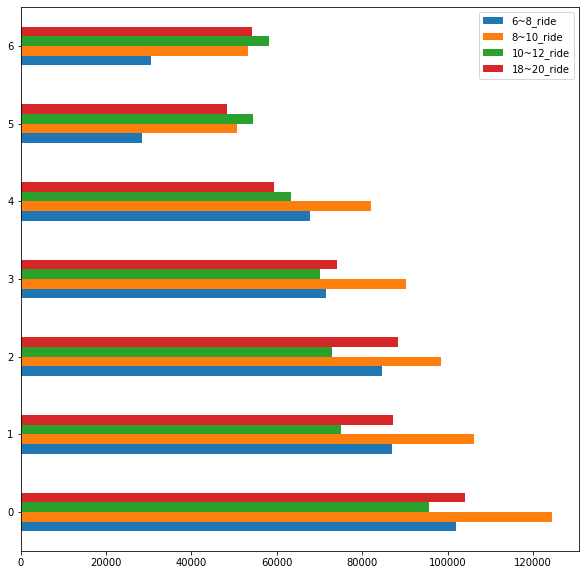

In [ ]:
weekride.plot(kind='barh', figsize=(10, 10))

박스그래프를 그려봅시다. 

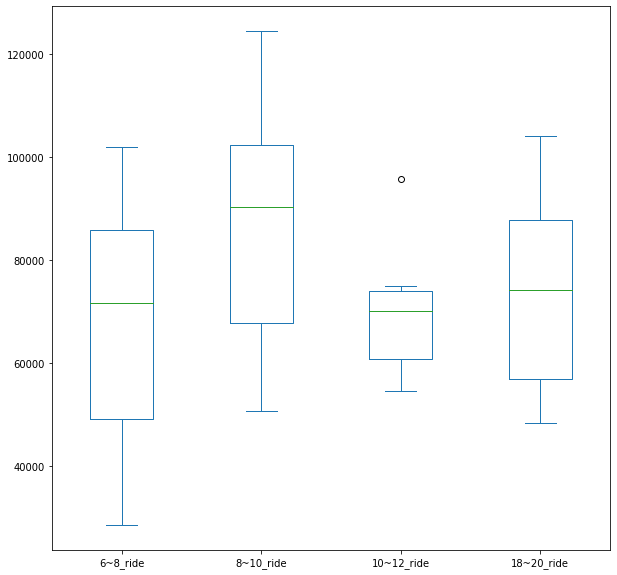

In [ ]:
weekride.plot(kind='box', figsize=(10, 10))

결과값들을 보면 

1. 평일에는 8시에서 10시 사이가 승차인원이 가장 많다.
2. 주말에는 10시부터 12시 사이가 승차인원이 가장 많다. 
3. 10시부터 12시사이에는 이상치가 존재한다.
4. 토요일에 급격하게 승차인원이 줄어든다. 


라는 것을 알 수 있습니다. 


### **🔑참여 실습**


### *Inst.*  
weektakeoff도 데이터를 시각화하고 분석해봅시다. 


### *Hint.*  
plot()


### *Solution.*

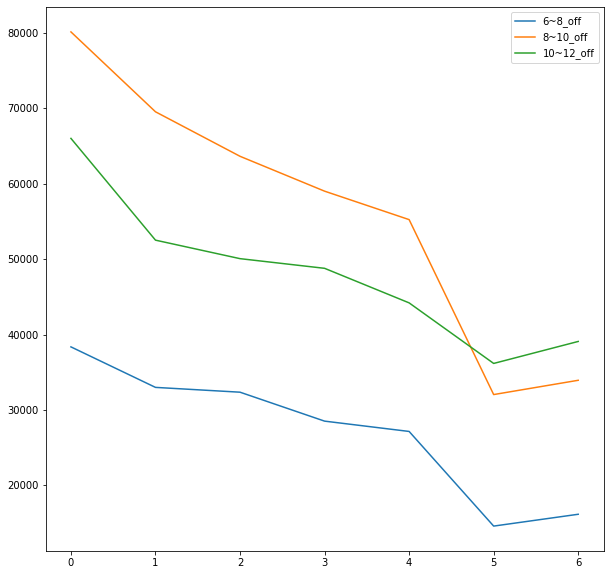

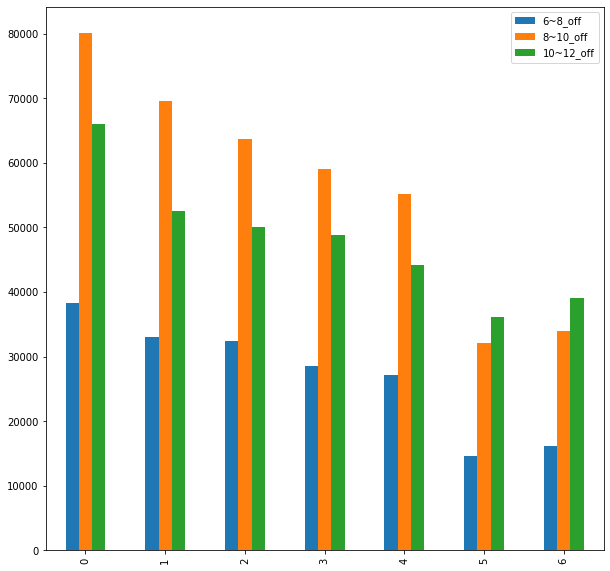

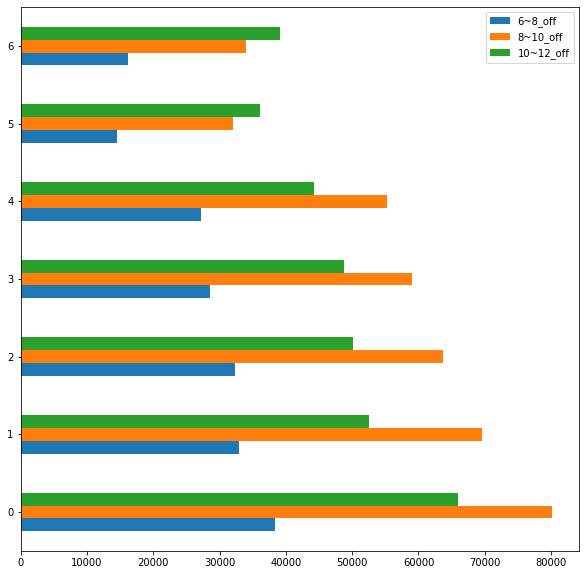

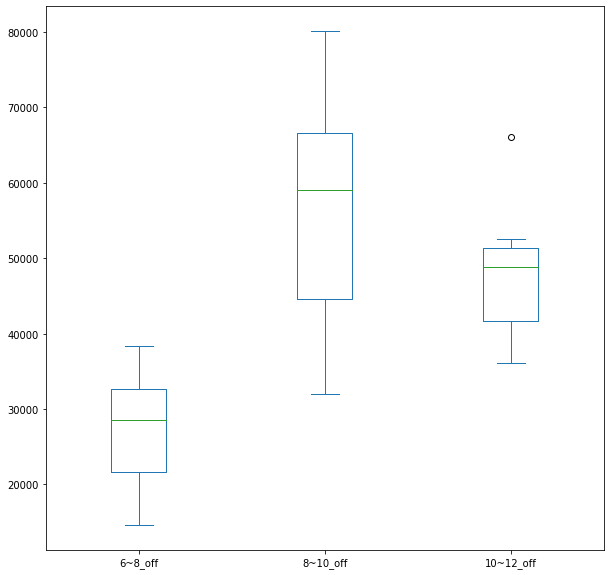

In [ ]:
weektakeoff.plot(figsize=(10, 10))
weektakeoff.plot(kind='bar', figsize=(10, 10))
weektakeoff.plot(kind='barh', figsize=(10, 10))
weektakeoff.plot(kind='box', figsize=(10, 10))

결과값들을 보면 

1. 평일에는 8시에서 10시사이가 하차인원이 가장 많다. 
2. 주말에는 10시에서 12사이가 하차인원이 가장 많다. 
3. 10시에서 12시 사이에 이상치가 존재한다.
4. 6시에서 8시 사이가 하차인원이 가장 적다. 

라는 것을 알 수 있습니다.


# **3.이상치 확인하기**

이상치<란 다른 값들과 비교해서 너무 크거나 너무 작은 비정상적인 값을 말합니다.
</br> 데이터에 이상치가 존재할 때 데이터가 의미하는 바를 제대로 분석하지 못할 수 있기 때문에 </br> 데이터 분석의 목적에 따라서 이상치를 삭제하거나 수정 할 수 있습니다. 
</br> 

이상치를 확인할 때 박스그래프에서 사용한 <font style="color:#99CCFF; font-weight : bold; font-size : 25px;">IQR</font>을 이용합니다. 


takeoff 데이터에 대해서 박스 그래프를 그려봅시다. 

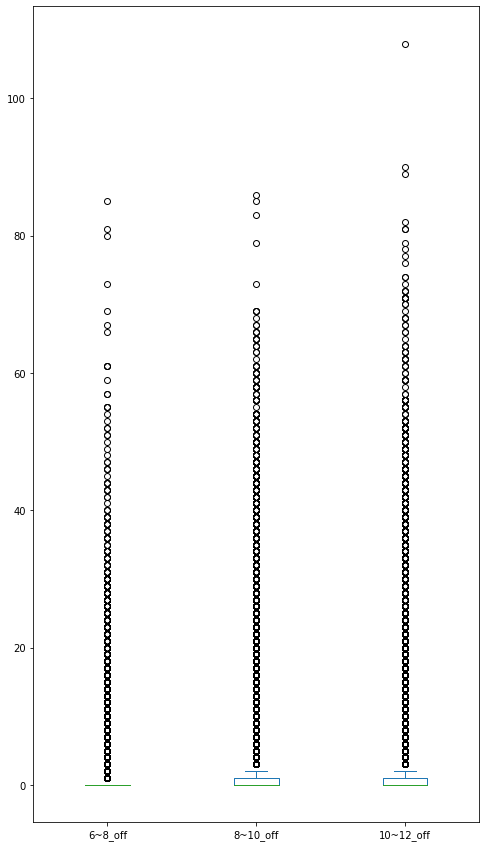

In [ ]:
train[takeoff].plot(kind='box',figsize=(8,15))

### **🔑참여 실습**


### *Inst.*  
ride 데이터에 대해서 박스 그래프를 그려봅시다


### *Hint.*  
plot()


### *Solution.*

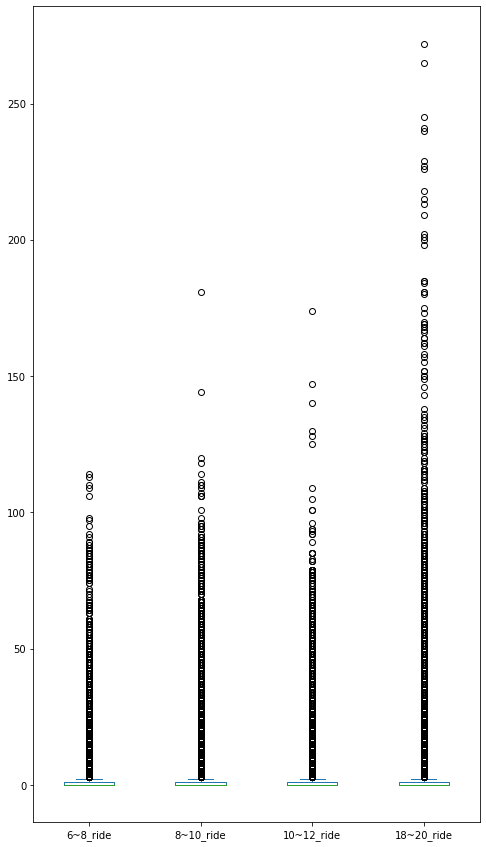

In [ ]:
train[ride].plot(kind='box',figsize=(8,15))

박스그래프를 보면 데이터에 이상치가 많다는 것을 알 수 있습니다. 

데이터 시각화에서 그렸던 박스 그래프와 다른 이유는 사용한 데이터가 다르기 때문입니다. 

박스 그래프에서 이상치의 값은 4분위수를 이용해서 구합니다. 
</br>이때 사용하는 메소드가 <font style="color:#99CCFF; font-weight : bold; font-size : 25px;">quantile()</font> 메소드 입니다. 
</br>quantile() 메소드는 해당 행/열의 분위수의 해당하는 값을 반환합니다. 



0.75분위, 즉 제3분위수의 값을 출력합니다. 

In [ ]:
train.quantile(0.75)

date            4.000000e+00
bus_route_id    3.003000e+07
in_out          0.000000e+00
station_code    2.226000e+03
latitude        3.350002e+01
longitude       1.265759e+02
18~20_ride      1.000000e+00
6~8_ride        1.000000e+00
8~10_ride       1.000000e+00
10~12_ride      1.000000e+00
6~8_off         0.000000e+00
8~10_off        1.000000e+00
10~12_off       1.000000e+00
Name: 0.75, dtype: float64

0.25분위, 제1분위수의 값을 출력합니다. 

In [ ]:
train.quantile(0.25)

date            1.000000e+00
bus_route_id    2.346000e+07
in_out          0.000000e+00
station_code    3.200000e+02
latitude        3.329108e+01
longitude       1.264758e+02
18~20_ride      0.000000e+00
6~8_ride        0.000000e+00
8~10_ride       0.000000e+00
10~12_ride      0.000000e+00
6~8_off         0.000000e+00
8~10_off        0.000000e+00
10~12_off       0.000000e+00
Name: 0.25, dtype: float64

이제 IQR의 값을 구해봅시다. 

IQR은 제3분위수 - 제1분위수의 값입니다.

In [ ]:
iqr = train.quantile(0.75) - train.quantile(0.25)

이상치는 3분위수 + IQR 값보다 큰 값들을 의미합니다.

In [ ]:
train.quantile(0.75) + iqr *1.5

date            8.500000e+00
bus_route_id    3.988500e+07
in_out          0.000000e+00
station_code    5.085000e+03
latitude        3.381343e+01
longitude       1.267261e+02
18~20_ride      2.500000e+00
6~8_ride        2.500000e+00
8~10_ride       2.500000e+00
10~12_ride      2.500000e+00
6~8_off         0.000000e+00
8~10_off        2.500000e+00
10~12_off       2.500000e+00
dtype: float64

이상치를 bool형태로 데이터프레임에 표현해봅시다.

In [ ]:
train > train.quantile(0.75) + iqr *1.5

,date,bus_route_id,in_out,station_code,latitude,longitude,18~20_ride,6~8_ride,8~10_ride,10~12_ride,6~8_off,8~10_off,10~12_off
id,,,,,,,,,,,,,
0,False,False,True,False,False,False,False,False,True,True,False,False,False
1,False,False,True,False,False,False,True,True,True,True,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,False,False,False,False,False,False,False,True,False,False,False,False,False
415419,False,False,False,False,False,False,False,True,False,False,False,False,False
415420,False,False,False,False,False,False,False,False,False,False,True,False,False


True를 가진 데이터가 이상치의 값입니다. 

train.quantile(0.75) + iqr *1.5의 결과값을 보면 알 수 있지만 
</br>이상치의 값은 0, 2.5보다 크면 모두 이상치로 취급하게 됩니다. 

train의 승하차 인원의 데이터는 대부분 0과 1의 값을 가지고 있어서 </br>최대값과 최소값의 차이가 많이 나는 것을 알 수 있습니다. 

저희는 데이터 특성상 이상치를 제거하거나 변경하지 않고 확인만 하고 넘어가도록 하겠습니다.


# **4. 모델링(Modeling)**

## **4.1 validation set**
딥러닝에서 신경망 모델을 학습하고 평가하기 위해 data set이 필요합니다. 이전까지는 공부를 할 때는 train set과 test set 두개로만 데이터를 나누었습니다. 
</br>이렇게 train, test 두개로만 분리하는 것은 기초적인 수준입니다.

</br>보통 dataset을 성질에 맞게 3가지로 분류합니다.
</br><font style="font-weight : bold">1. Train set
</br>2. Validation set
</br>3. Test set</font>
![image](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FctzBsg%2Fbtq8gmVCvGZ%2F8iLKfqrego1JopZQeSEXMK%2Fimg.png)
 
이렇게 각각 모델을 학습하고 검증하고 평가하는데에 목적을 서로 다르게 두고 있습니다. </br>이 세가지 data set이 정확히 무엇이고 어떤 성질을 띄는지 살펴보겠습니다.
 
>## **Train set**

모델을 학습하기 위한 data set입니다. </br>한 가지 계속 명심해야할 중요한 사실은 
</br><font style="font-weight : bold">"모델을 학습하는데에는 오직 유일하게 train dataset만 이용"</font>
</br>한다는 사실입니다.
 
보통 train set을 이용해 각기 다른 모델을 서로 다른 epoch로 학습을 시킵니다.
</br>여기서 각기 다른 모델이란 hidden layer 혹은 hyper parameter에 약간씩 변화를 줌을 뜻합니다.

>## **Validation set & Test set**

<font style="color:#99CCFF; font-weight : bold; font-size : 25px;">validation set</font>은 학습이 이미 완료된 모델을 <font style="font-weight : bold">검증</font>하기위한 data set입니다. <br/><font style="color:#99CCFF; font-weight : bold; font-size : 25px;">test set</font>은 학습과 검증이 완료된 모델의 성능을 <font style="font-weight : bold">평가</font>하기위한 data set입니다.

Train : Test 데이터를 8 : 2로 나누는데, Train 데이터 중 일부를 validation set으로 이용합니다.
</br>Train : Validation : Test 을 일반적으로 6 : 2 : 2로 이용합니다.
 
validation set과 test set의 <font style="color:#99CCFF; font-weight : bold; font-size : 25px;">공통점</font>은 </br>이 데이터를 통해 모델을 update 즉, 학습을 시키지 않는다는 것입니다.
</br>이렇게 validation set과 test set은 둘다 이미 학습을 완료한 모델에 대해 </br>평가하고 학습을 시키지 않는데 둘의 <font style="color:#FF9999; font-weight : bold; font-size : 25px;">차이</font>를 알아보겠습니다.

단순히 train, test로만 분리하면 train set으로 모델을 만들고 test set으로 성능을 평가하게 됩니다. </br>하지만, 보통 model을 만들 때는 한번에 model이 만들어지기 보다는 </br>피드백을 받고 수정을 거치는 경우가 대부분입니다. 

그런데 test set을 검증용으로 사용하면 훈련에 사용되었다고 보기 때문에 </br>모델 수정 후 동일한 test set으로 검증하면 정확한 성능 평가가 어렵습다. </br>그렇기 때문에 필요한 것이 바로 validation set입니다.
 
<font style="font-weight : bold">validation set</font>은 <font style="font-weight : bold">모델 성능 검증용</font>으로 </br>중간에 사용되는 dataset이므로 학습에 일정 부분 관여하게 됩니다. </br>test set은 train set으로 학습하고, validation set으로 검증까지 끝낸 모델에 대해</br> 최종적으로 성능을 평가할 때 사용합니다. </br>보통 모델을 다 만들어서 보고까지 끝낸 후 현업에 최종 배포하기 전에</br> <font style="font-weight : bold">test set</font>으로 <font style="font-weight : bold">최종 성능 평가</font>를 합니다.

결국, 둘의 차이는 Validation set은 모델을 <font style="color:#99CCFF; font-weight : bold; font-size : 25px;">update</font>, </br>즉 학습을 시키진 않지만 학습에 <font style="color:#99CCFF; font-weight : bold; font-size : 25px;">'관여'</font>는 합니다.

Test set은 학습에 전혀 관여하지 않고 오직 <font style="color:#FF9999; font-weight : bold; font-size : 25px;">'최종 성능'</font>을 평가하기 위해 쓰입니다.
</br>Validation set으로 학습을 하지 않는데 어떻게 학습에 관여하는지 아래 그림을 보면서 살펴겠습니다.
    
![image](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FmvGtd%2FbtqBcMffUgO%2FpJ6B5vd9Y5RoGE9L6xscVk%2Fimg.png)  
그림에서 우측으로 갈수록 epoch를 늘려가면서 train set을 학습시키는 과정입니다.
</br>그림을 보면 알 수 있듯이 가운데 그림은 train set뿐만아니라 </br>unseen data에 대해서도 좋은 성능을 보일것으로 보입니다.
</br>그러나 가장 우측그림을 보면 train set에 <font style="font-weight : bold">overfitting</font>되어 </br>다른 unseen data에 대해 <font style="font-weight : bold">안 좋은 성능</font>을 보일 것입니다.

즉, train set으로 학습을 할때 너무 높은 epoch로 학습시키면 </br><font style="color:#99CCFF; font-weight : bold; font-size : 25px;">"overfitting"</font>의 문제가 있습니다.

위 그림을 보면 파란색 baseline을 기준으로 더 학습시키면 </br>overfitting되어 test set에 대한 결과가 점점 안 좋아집니다.

따라서, 우리는 파란색 baseline 까지만 학습을 해야합니다. </br>다시말해, 파란색 baseline에 해당하는 epoch를 찾아야합니다.

그러나 이때 test set은 '최종 성능' 평가할때만 사용하므로 학습에 이처럼 관여해서는 안됩니다.
</br>결국 여기서 validation set이 사용되는 것입니다.
 
validation set을 사용하여 train set에 대한 epoch를 바꿔가면서 </br>위 그림과 같은 error 곡선을 그립니다.

그 후, baseline에 해당하는 epoch를 찾으면 해당 epoch까지만 모델을 학습시켜 </br>test set으로 '최종 성능'을 평가합니다.
</br>한마디로 위 그림에서의 test error를 validation set에 의한 <font style="font-weight : bold">validation error</font>라고 생각하면 됩니다.
 
이렇게 validation set은 train set에 의한 epoch뿐만 아니라 </br>다른 hyperparameter, hidden layer를 조정할 때도 사용될 수 있습니다. 

예를 들어, learning rate와 hidden layer를 조금 변형해가면서
</br>validation set에 대한 <font style="font-weight : bold">accuracy</font>를 보면서 
</br>적절한 hyperparameter, hidden layer를 결정하는 것입니다.
 
Validation set에 대한 <font style="color:#99CCFF; font-weight : bold; font-size : 25px;">"accuracy"</font>가 중요한 이유는 </br>학습에서 overfitting에 빠지지 않고, unseen data에 대한 좋은 성능을 가지는 것이 핵심적입니다.
 
따라서 최종 성능 평가를 위한 test 이전에 validation으로 어떤 모델을 어떤 epoch로 학습시킬 때, </br>unseen data에 대해서 좋은 성능을 보이는 모델이 무엇인지 파악하야 합니다.

## **4.2 Linear Regression + validation set**
train, test는 앞에서 이미 나눴으므로 train을 다시 train-val로 나눕니다.

In [ ]:
# 사이킷런의 train_test_split 사용
from sklearn.model_selection import train_test_split

In [ ]:
# LinearRegression 객체 호출
from sklearn.linear_model import LinearRegression

In [ ]:
# train set을 자동으로 3:1로 train, val 나누기
x_train, x_val, y_train, y_val = train_test_split(x, y)
print(x.shape,x_train.shape, x_val.shape)

(415423, 12) (311567, 12) (103856, 12)


In [ ]:
# 모델 선언
model = LinearRegression()

In [ ]:
# 모델 훈련
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# 학습된 model로 x_train의 결과를 얻어낸 다음, 그 예측과 y_train을 비교
# training set 정확도 확인
print("training set accuracy:", model.score(x_train, y_train))

training set accuracy: 0.43806734276411674


### **🔑참여 실습**


### *Inst.*  
validation set 정확도 확인


### *Hint.*  
model.score()


### *Solution.*

In [ ]:
print("validation set accuracy:", model.score(x_val, y_val))

validation set accuracy: 0.44234921651911896


In [ ]:
# 학습된 모델을 이용해 결괏값 예측
predict = model.predict(test)
predict

array([ 9.27068286, 13.75443949,  3.81886976, ...,  0.08748724,
        0.05433092, -0.54004479])

In [ ]:
# 반올림
predict = predict.round(0)
predict

array([ 9., 14.,  4., ...,  0.,  0., -1.])

In [ ]:
# float type -> int type 변환
predict = predict.astype(int)
predict

array([ 9, 14,  4, ...,  0,  0, -1])

In [ ]:
# 0보다 작은 수를 0으로 변환
predict[predict < 0] = 0
predict

array([ 9, 14,  4, ...,  0,  0,  0])

# **5. 제출파일 생성**

train data, test data, validation data로 나눈 다음 학습은 진행하였습니다.
</br>이를 통한 Linear Regression Model의 예측값으로 test의 18~20_ride 값을 채워봅시다. 

In [ ]:
test['18~20_ride'] = predict
test['18~20_ride'] 

id
415423     9
415424    14
415425     4
415426    34
415427     1
          ..
643588     0
643589     0
643590     0
643591     0
643592     0
Name: 18~20_ride, Length: 228170, dtype: int64

지난 시간에 설명드렸 듯이 to_csv 메소드는 </br>데이터 프레임 객체의 내용을 csv 파일 형태로 만들어서 저장해 주는 기능입니다.
</br>index를 포함시키지 않고 데이터를 저장하기 위해서는 </br>to_csv(inedx=False)로 지정해서 데이터를 저장해주면 됩니다.

</br>이제 제출용 파일인 submission.csv를 저장해봅시다. 

In [ ]:
test[['18~20_ride']].to_csv('submission.csv')